In [1]:
import xarray
import rioxarray as rio

# for the visz
import matplotlib.pyplot as plt
import cartopy as cp # of nieuwe cartopy versie, of matplotlib 3.5.2 wanneer cartopy nog op 0.21 zit
import cartopy.feature as cfeature
import cartopy.crs as ccrs

In [2]:
# projection RD
crs_rd = cp.crs.Stereographic(central_longitude=5.3876388888, central_latitude=52.15616055555, false_easting=155000, false_northing=463000, scale_factor=0.9999079)

# collect country shapefile
countries = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_0_countries',
    scale='10m',
    facecolor='none')

In [3]:
xds_current = xarray.open_dataset('precip.KNMI-1950.nc')
xds_current

<xarray.Dataset>
Dimensions:       (time: 365, rlat: 101, rlon: 67)
Coordinates:
  * time          (time) datetime64[ns] 1950-01-01 1950-01-02 ... 1950-12-31
    lon           (rlat, rlon) float64 ...
    lat           (rlat, rlon) float64 ...
  * rlon          (rlon) float64 -1.75 -1.64 -1.53 -1.42 ... 5.18 5.29 5.4 5.51
  * rlat          (rlat) float64 -8.7 -8.59 -8.48 -8.37 ... 1.97 2.08 2.19 2.3
Data variables:
    rotated_pole  int32 ...
    precip        (time, rlat, rlon) float32 ...
Attributes:
    CDI:            Climate Data Interface version 2.0.5 (https://mpimet.mpg....
    Conventions:    CF-1.6
    history:        Thu May 04 08:45:03 2023: cdo -s -f nc -settunits,days -s...
    CDO:            Climate Data Operators version 2.0.5 (https://mpimet.mpg....
    obsQuantiles:   /nobackup/users/brinkh/GRADE/extract_from_EOBS/quantiles/...
    refQuantiles:   quantiles/quantiles_per_month_RACMO23_hist_1950.nc
    probabilities:  quantiles/quantiles_per_month_RACMO23_hist_1950.nc

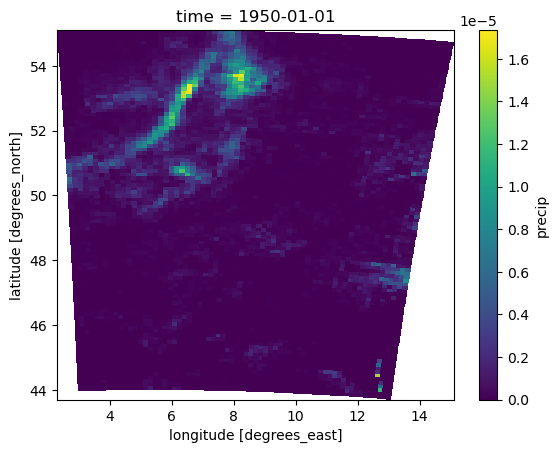

In [4]:
my_single_current = xds_current.precip.sel(time='1950-01-01')
my_single_current.plot(x='lon', y='lat')

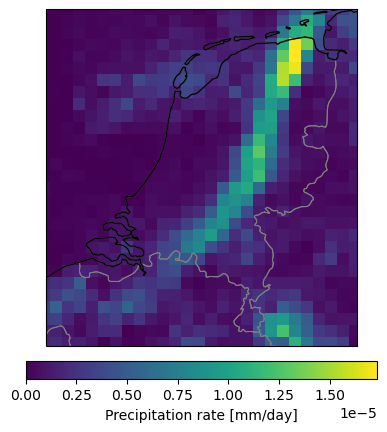

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=crs_rd)
ax.set_extent([2.9, 7.4, 50.6, 53.7], crs=ccrs.PlateCarree())

# ax.gridlines() # can only be in degrees, maybe with cartopy v0.18 more choice
ax.add_feature(cfeature.LAND.with_scale('10m'), alpha=0.2)
ax.add_feature(cfeature.OCEAN.with_scale('10m'), alpha=0.2)
ax.add_feature(countries, edgecolor='gray', linewidth=0.75)
ax.coastlines(resolution='10m', color='k', linewidth=1)

im = ax.pcolormesh(my_single_current.lon.values, my_single_current.lat.values, my_single_current.values, transform=ccrs.PlateCarree())
cb = plt.colorbar(im, fraction=0.0476, pad=0.04, orientation='horizontal')
cb.set_label('Precipitation rate [mm/day]')
plt.show()

In [6]:
xds_future = xarray.open_dataset('pr_Hn_2150_interp.nc')

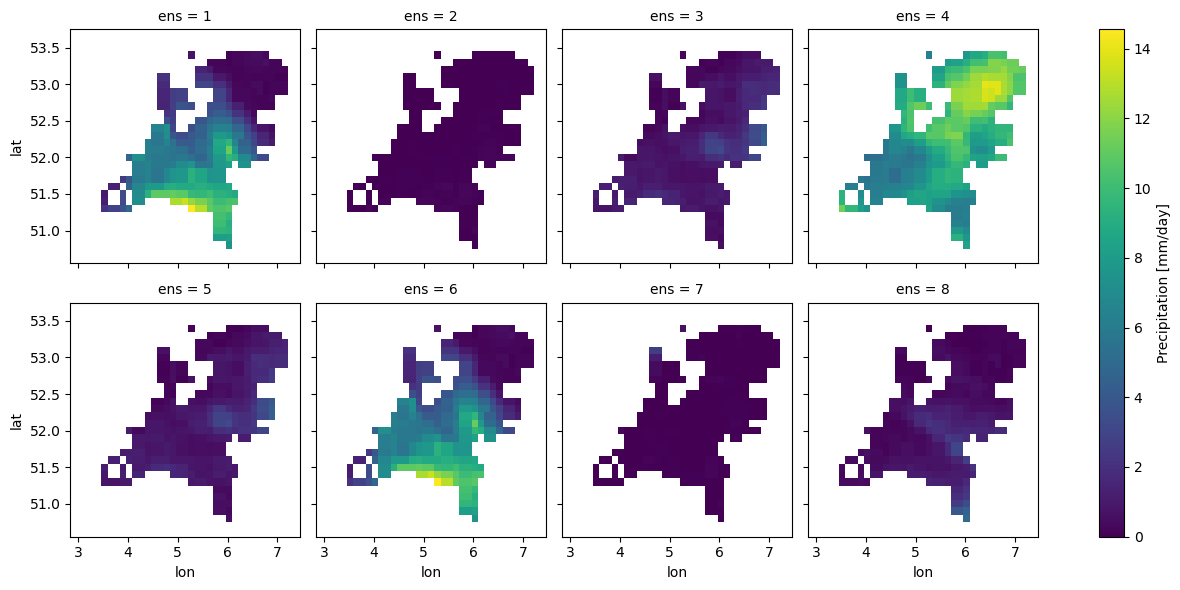

In [7]:
my_facet_future = xds_future.pr.sel(time='2136-01-01')
my_facet_future.plot(x='lon', y='lat', col='ens', col_wrap=4)

In [8]:
my_single_future = xds_future.pr.sel(time='2136-01-01', ens=1)
my_single_future.lon.min().values, my_single_future.lon.max().values, my_single_future.lat.min().values, my_single_future.lat.max().values

(array(2.9), array(7.4), array(50.6), array(53.7))

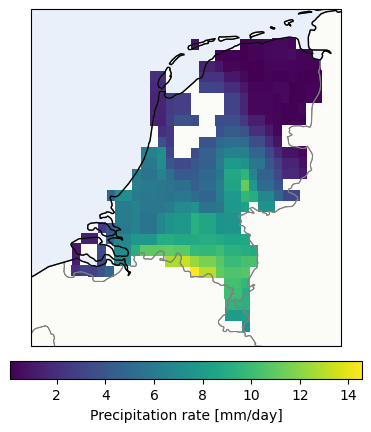

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=crs_rd)
ax.set_extent([2.9, 7.4, 50.6, 53.7], crs=ccrs.PlateCarree())

# ax.gridlines() # can only be in degrees, maybe with cartopy v0.18 more choice
ax.add_feature(cfeature.LAND.with_scale('10m'), alpha=0.2)
ax.add_feature(cfeature.OCEAN.with_scale('10m'), alpha=0.2)
ax.add_feature(countries, edgecolor='gray', linewidth=0.75)
ax.coastlines(resolution='10m', color='k', linewidth=1)

im = ax.pcolormesh(my_single_future.lon.values, my_single_future.lat.values, my_single_future.values, transform=ccrs.PlateCarree())
cb = plt.colorbar(im, fraction=0.0476, pad=0.04, orientation='horizontal')
cb.set_label('Precipitation rate [mm/day]')
plt.show()

In [10]:
epsg_4326 = rio.crs.CRS.from_epsg(4326)  # mercator
epsg_28992 = rio.crs.CRS.from_epsg(28992)  # rijksdriehoek
my_single_future_4326 = my_single_future.rio.write_crs(epsg_4326)
my_single_future_28992 = my_single_future_4326.rio.reproject(epsg_28992)

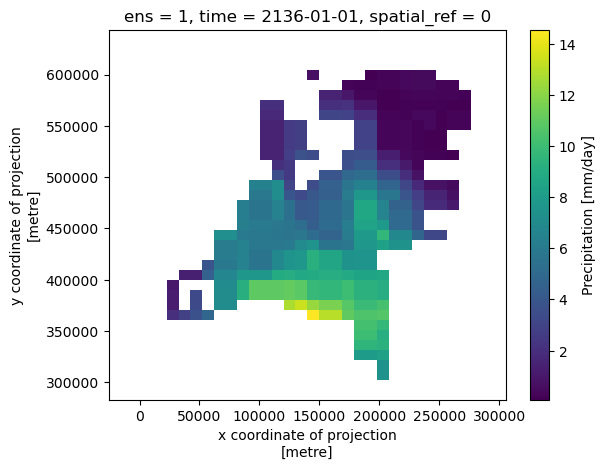

In [11]:
my_single_future_28992.plot()

In [12]:
crs_rotated = rio.crs.CRS.from_proj4(xds_current.rotated_pole.proj4_params)
my_single_current_rotated = my_single_current.rio.write_crs(crs_rotated)
# dit werkt niet: ValueError: IndexVariable objects must be 1-dimensional
# my_single_current_28992 = my_single_current_rotated.rio.reproject(epsg_28992)